In [1]:
# Import modules
%run config.ipynb
%matplotlib inline
import visualization.init as init
import visualization.axes as ax
import computation.update as model
import matplotlib.animation as animation

In [2]:
# Import configuration
import json
with open("config.json") as f:
    CONFIG = json.load(f)
    PARAMS = CONFIG["PARAMS"]
    MODEL = CONFIG["MODEL"]

In [3]:
# Set Matplotlib display settings
import matplotlib.pyplot as plt
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams['hatch.color'] = 'lightgrey'
plt.rcParams['hatch.linewidth'] = 0.2
plt.rcParams['font.size'] = 32
plt.rcParams['savefig.facecolor'] = 'white'

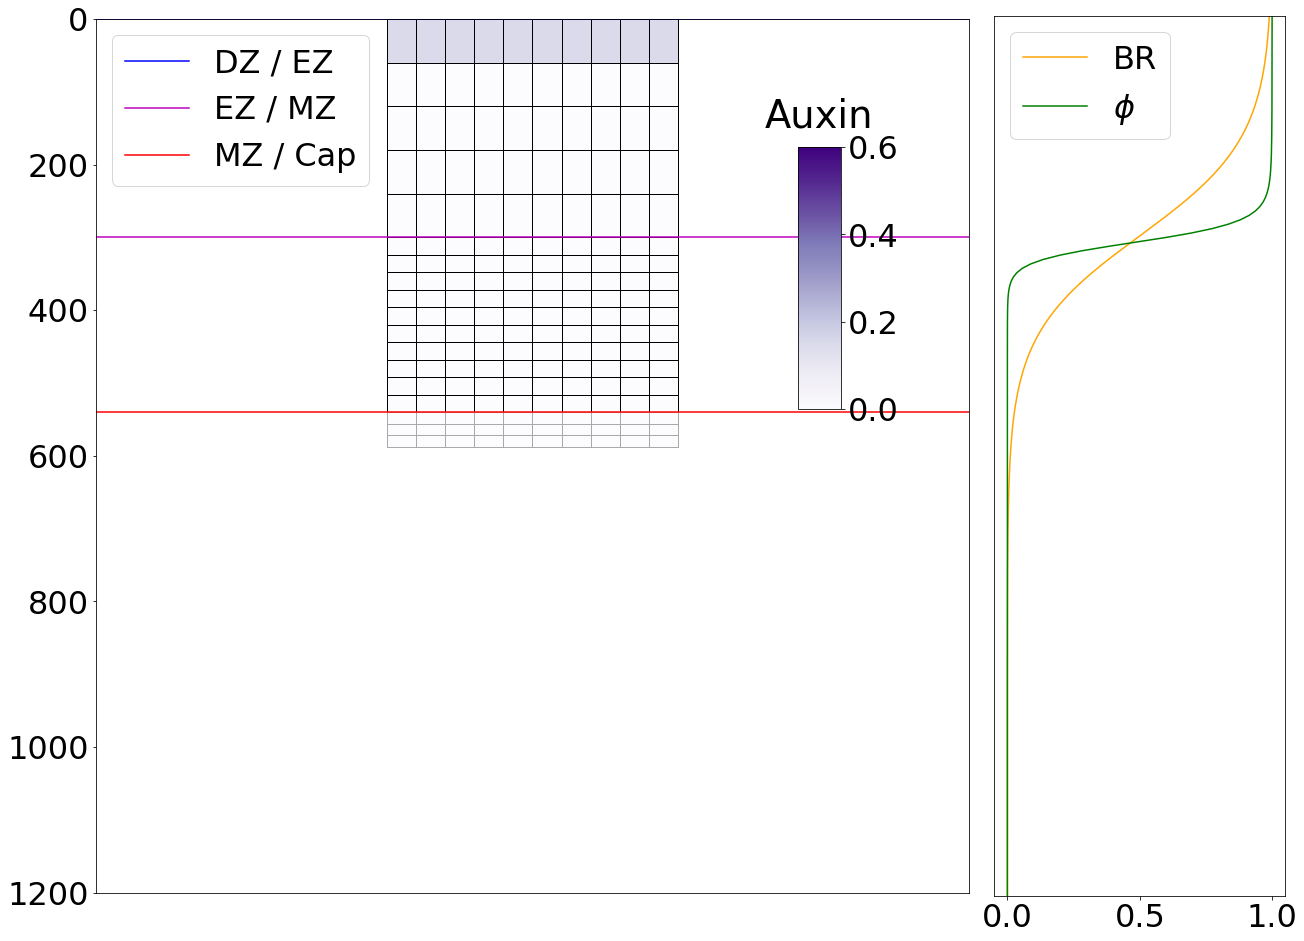

In [4]:
# Set the initial state of the model and draw a plot
network = init.generate_network()
fig, ax1, ax2 = init.initialize_plot(network)

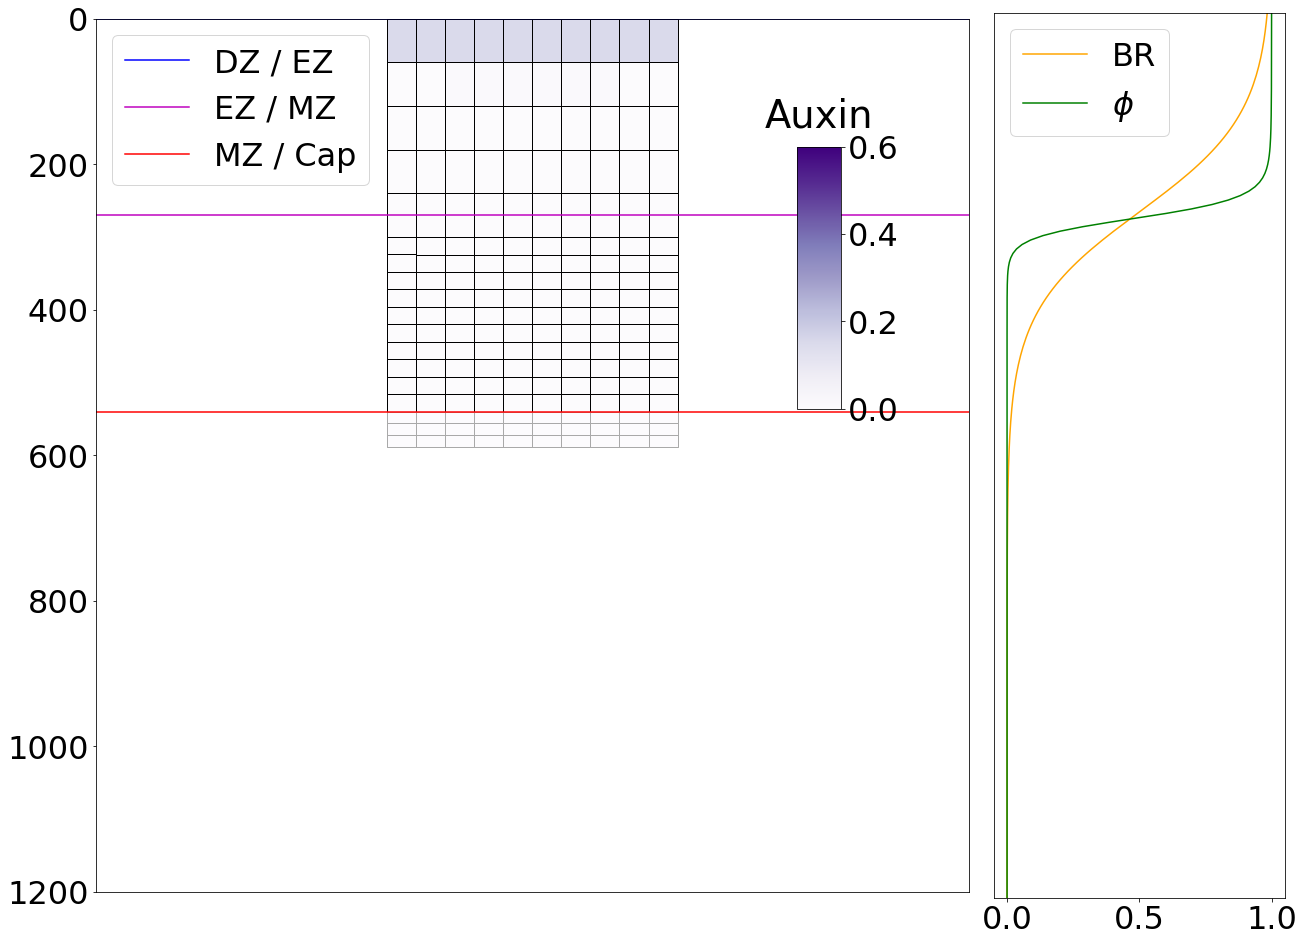

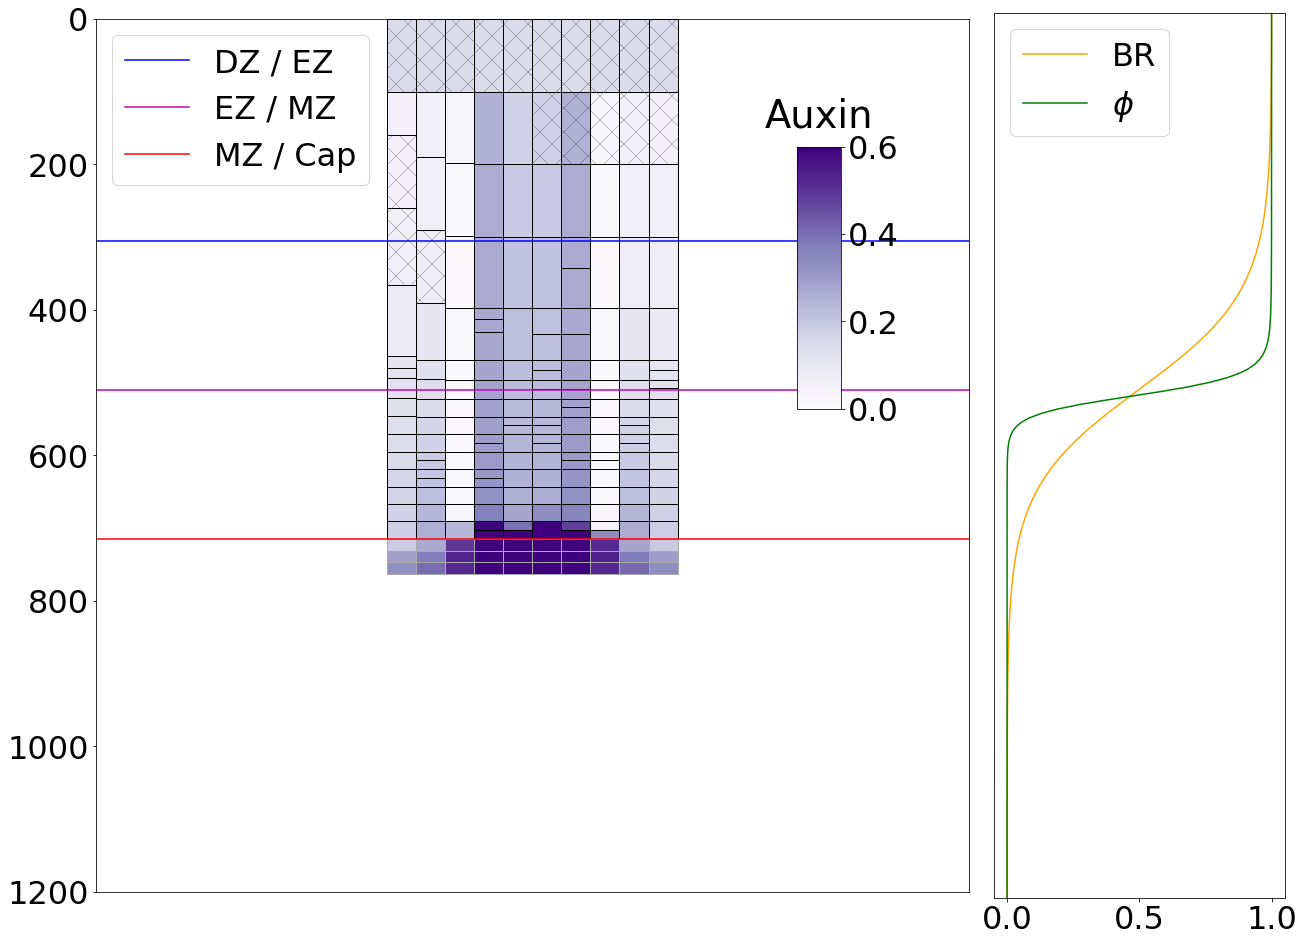

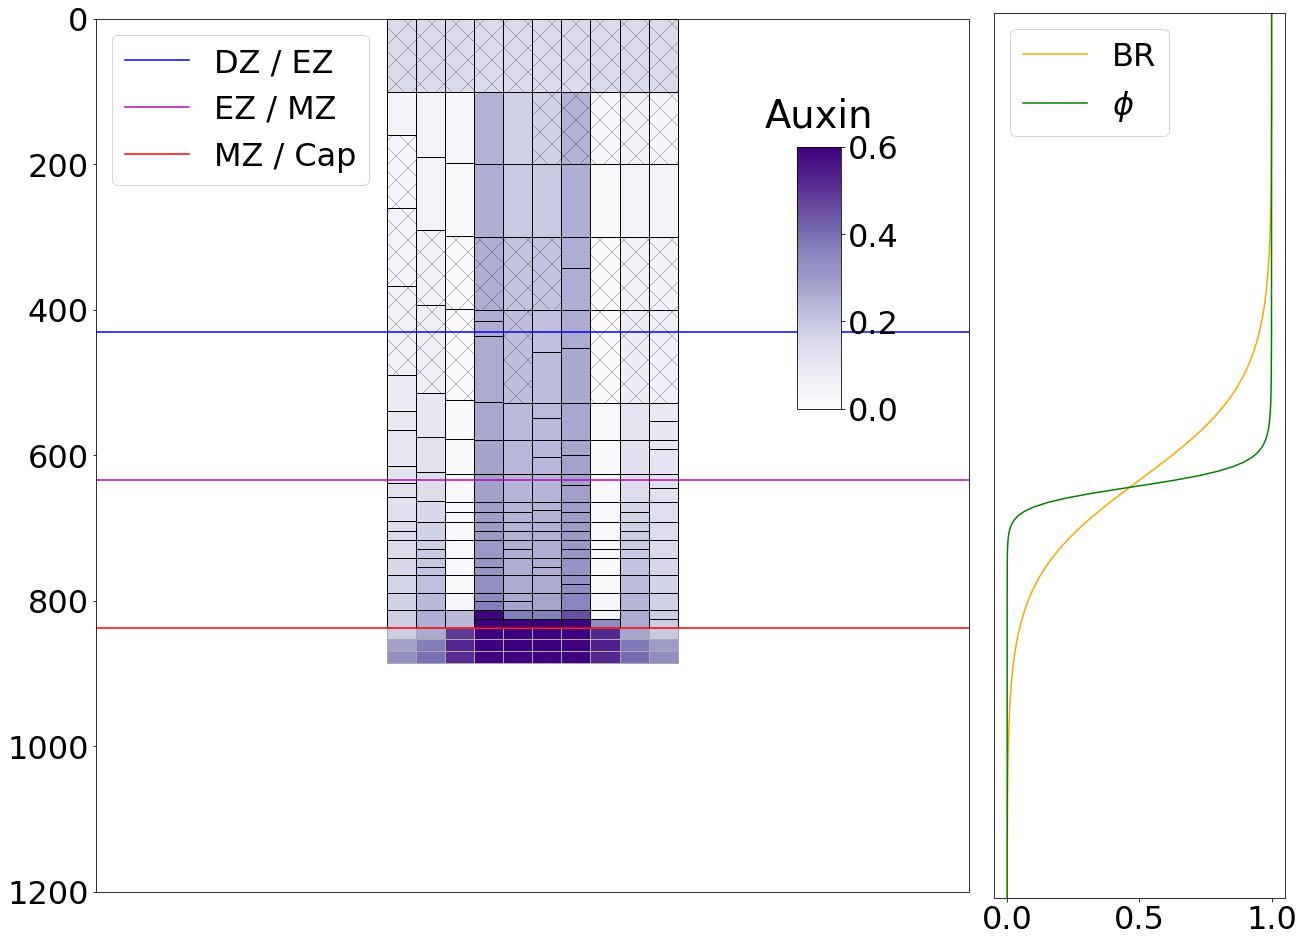

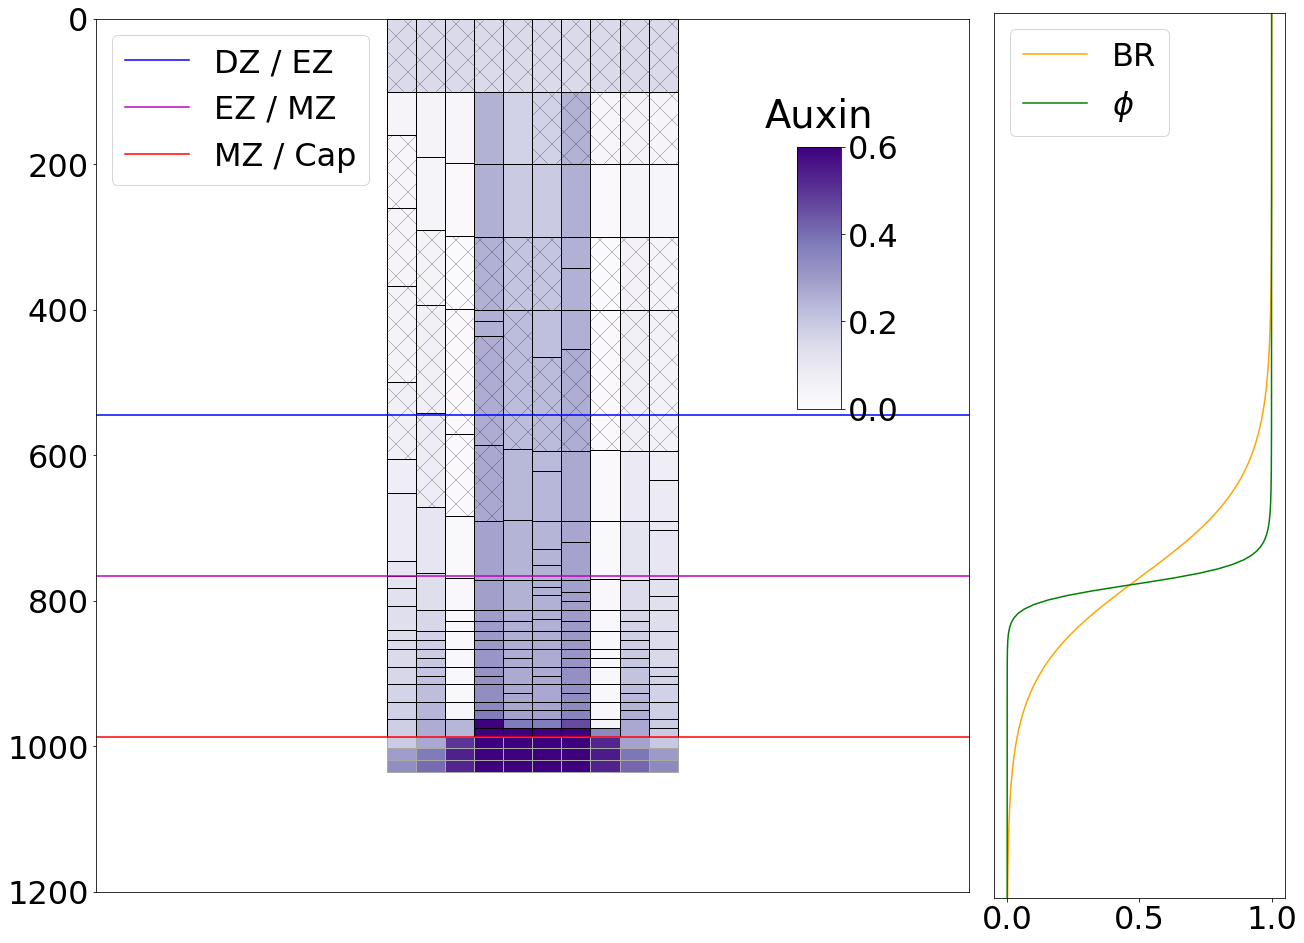

In [5]:
# Produce a list of animation information
animationInfo = [network]

for i in range(MODEL["nsteps"]):
    network = model.update_cells(network)
    if i % VISUAL["speed"] == 0:
        animationInfo.append(network)
        
    if i == 0 or i == 3000 or i == 6000 or i == 9000:
        fig, ax1, ax2 = init.initialize_plot(network)
        fig.savefig("figures/result" + str(i // 3000))

(<Figure size 1296x936 with 3 Axes>, <AxesSubplot:>, <AxesSubplot:>)

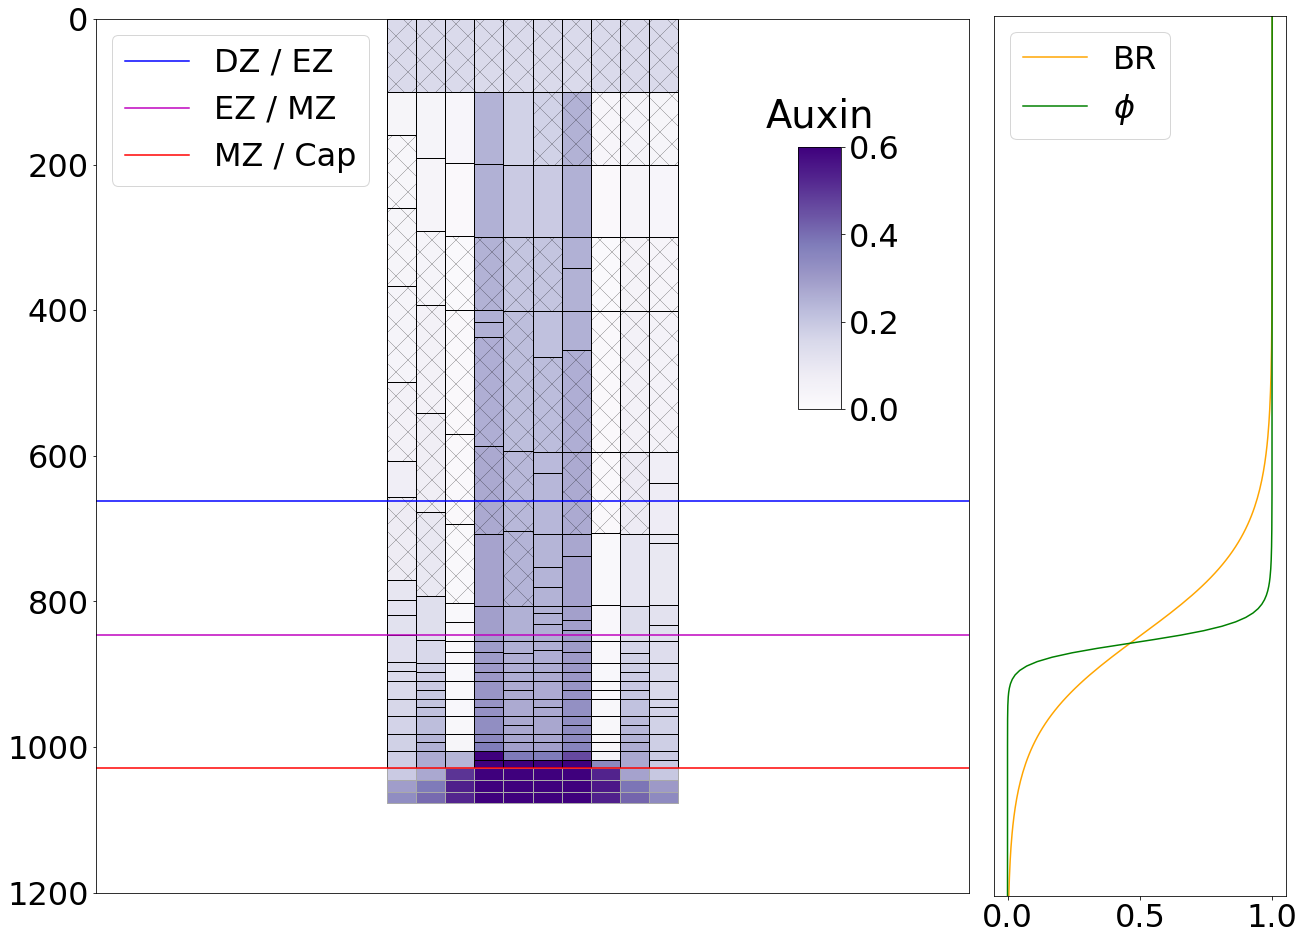

In [6]:
init.initialize_plot(network)

In [7]:
# Define an update function and run the animation
def update(info):
    U, C, P, B, Z = info
    return (ax.axes_main(ax1, U, C, P, Z), ax.axes_gradient(ax2, U, Z))

anim = animation.FuncAnimation(fig = fig, func = update, frames = animationInfo, interval = 300, repeat = False)
writer = animation.PillowWriter() 
anim.save('animations/model.gif', writer = writer) 